## Importing libraries

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import pandas as pd
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [4]:
df = pd.read_csv("Hotel_Reviews.csv")

In [5]:
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

In [6]:
df = pd.read_csv("Hotel_Reviews.csv", parse_dates=["Review_Date"])

In [7]:
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

## Preprocessing

In [8]:
df['review'] = df['Negative_Review']+df['Positive_Review']

In [9]:
df['review'].head()

0     I am so angry that i made this post available...
1    No Negative No real complaints the hotel was g...
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
Name: review, dtype: object

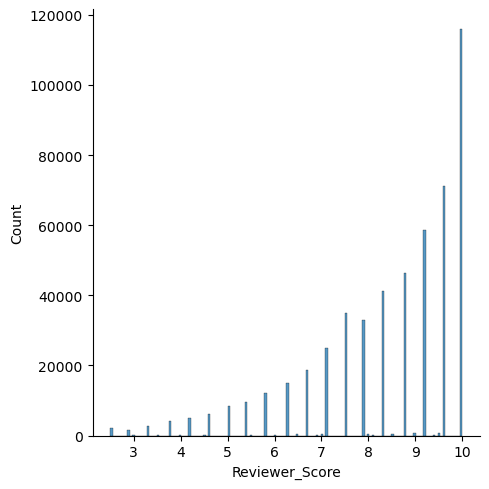

In [10]:
sns.displot(df.Reviewer_Score)

In [11]:
df['Reviewer_Score'].describe() # we will devide scores <7 - BAD, and above 7 is a good review 

count    515738.000000
mean          8.395077
std           1.637856
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64

In [12]:
df['review_type'] = df['Reviewer_Score'].apply(lambda x: "bad" if x <7 else "good")

In [13]:
df['review_type']

0          bad
1         good
2         good
3          bad
4          bad
          ... 
515733    good
515734     bad
515735     bad
515736    good
515737    good
Name: review_type, Length: 515738, dtype: object

C:\Users\Korisnik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_type', ylabel='count'>

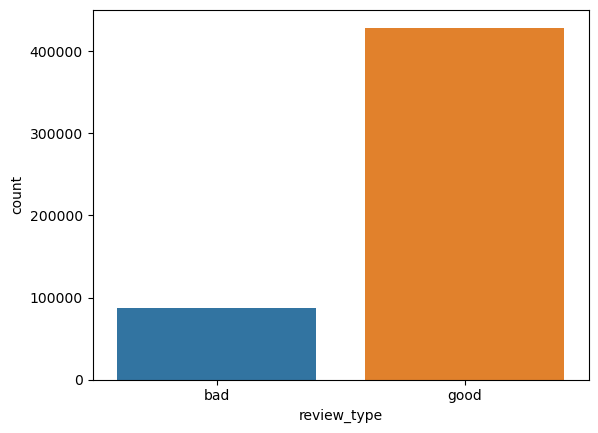

In [14]:
sns.countplot(df.review_type) #inbalanced classification problem

In [15]:
# Creating two data frames - Good & Bad Review DF
good_review = df[df.review_type == 'good']
bad_review = df[df.review_type == 'bad']

In [16]:
good_review_text = " ".join(good_review.review.to_numpy().tolist())
bad_review_text = " ".join(bad_review.review.to_numpy().tolist())

In [17]:
# Importing wordCloud to see what words are most common in these reviews
from wordcloud import WordCloud, STOPWORDS

In [18]:
#Stopwords are those that do not have meaning to us
good_reviews_cloud = WordCloud(stopwords = STOPWORDS, background_color='white').generate(good_review_text)
bad_reviews_cloud = WordCloud(stopwords = STOPWORDS, background_color='white').generate(bad_review_text)

In [19]:
def show_word_cloud(cloud):
    plt.figure(figsize = (40,30))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show

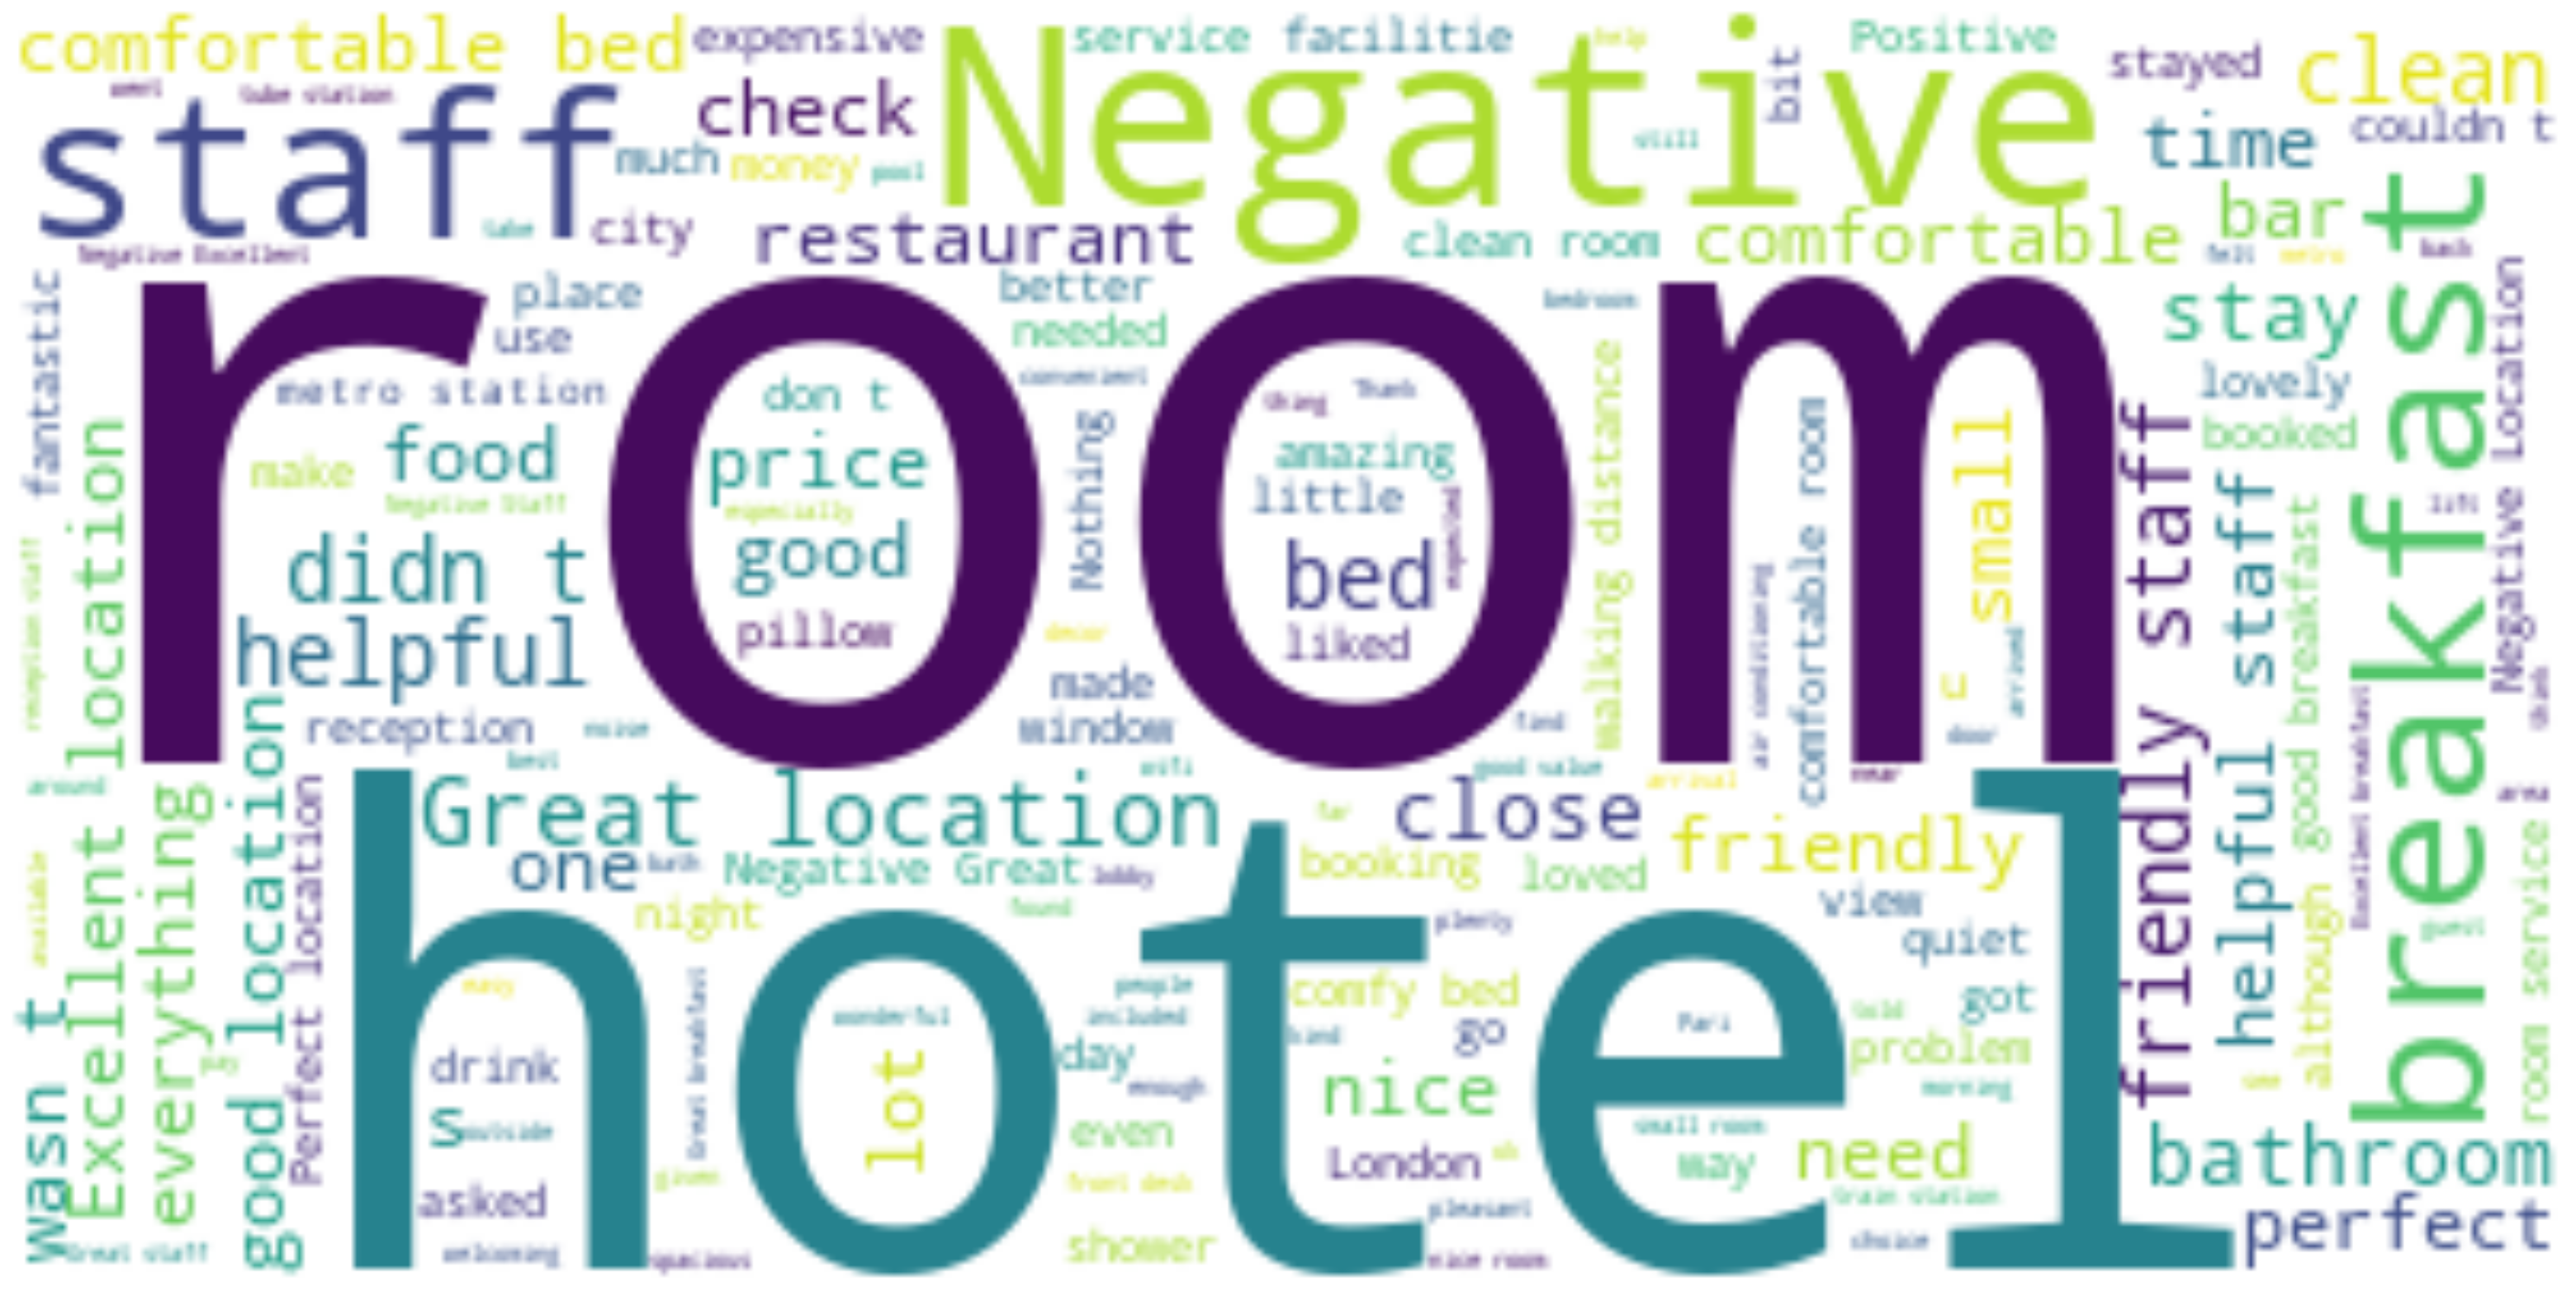

In [20]:
show_word_cloud(good_reviews_cloud)

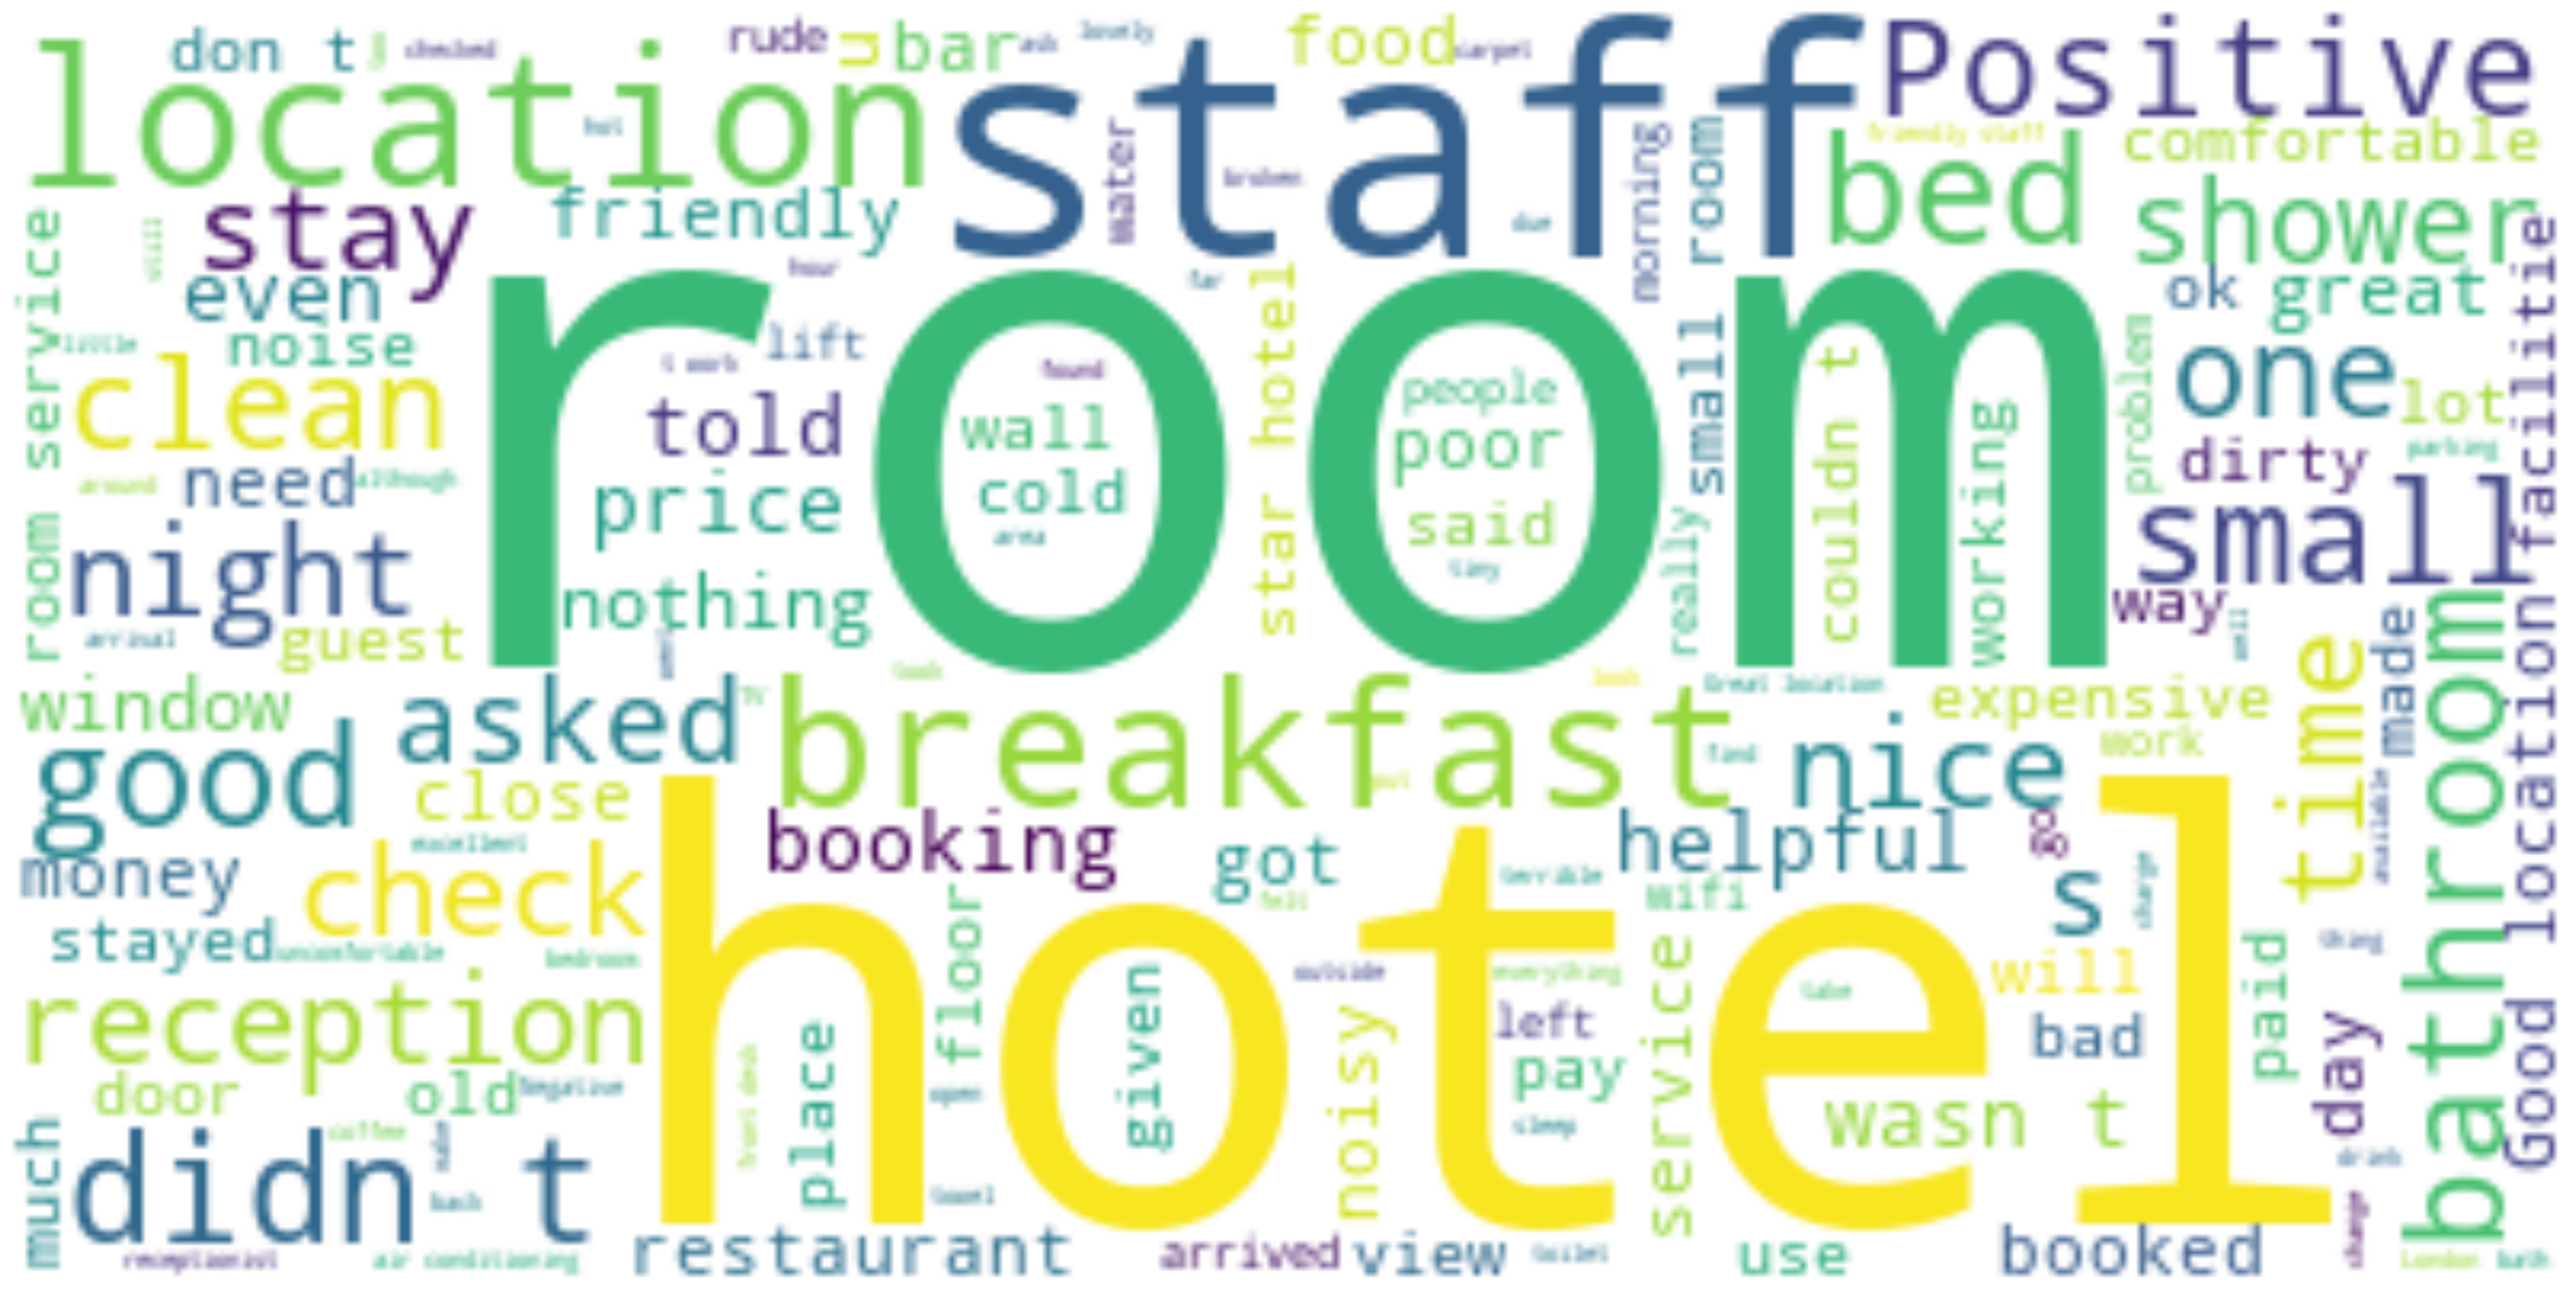

In [21]:
show_word_cloud(bad_reviews_cloud)

In [22]:
# I will take the same number of good review as the number we have for bed reviews - it will be taken randomly

In [23]:
good_df = good_review.sample(n = len(bad_review), random_state=101)
bad_df = bad_review

In [24]:
print(good_df.shape, bad_review.shape)

(86851, 19) (86851, 19)


In [25]:
review_df = good_df.append(bad_df).reset_index(drop=True)

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_22040\996243007.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  review_df = good_df.append(bad_df).reset_index(drop=True)


In [26]:
review_df.head()

Hotel_Address  \
0  151 157 City Road Shoreditch Islington London ...   
1  57 59 Welbeck Street Westminster Borough Londo...   
2  Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...   
3  5 Fairmont Avenue Canary Wharf Tower Hamlets L...   
4  2 Montagu Place Westminster Borough London W1H...   

   Additional_Number_of_Scoring Review_Date  Average_Score  \
0                          1471  2016-04-15            9.1   
1                           241  2017-06-21            7.5   
2                           612  2016-10-26            8.6   
3                           620  2017-02-21            9.0   
4                            65  2016-01-26            9.1   

                                    Hotel_Name        Reviewer_Nationality  \
0    M by Montcalm Shoreditch London Tech City             United Kingdom    
1             Holiday Inn London Oxford Circus                    Nigeria    
2                            Urban Lodge Hotel                   Portugal    
3  Radisson Blu Edwardian New Providence Wharf             United Kingdom    
4                          Montagu Place Hotel   United States of America    

                                     Negative_Review  \
0   There was no remote control for the tv in the...   
1                                     Stay was short   
2                                        No Negative   
3                  No Fried eggs in breakfast buffet   
4                         The bed was uncomfortable    

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                 47                     4802   
1                                  4                     1287   
2                                  0                     5018   
3                                  7                     1974   
4                                  6                      287   

                                     Positive_Review  \
0                     Accommodation and staff great    
1    Very convenient location and excellent property   
2   comfortable room with bathroom and heating mo...   
3   Staff very friendly and helpful Convenient fo...   
4   The facilities staff and location was wonderf...   

   Review_Total_Positive_Word_Counts  \
0                                  6   
1                                  7   
2                                 12   
3                                 12   
4                                 14   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           2             9.2   
1                                           4            10.0   
2                                           6             9.2   
3                                           1             9.2   
4                                          32             9.2   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Club Double R...           475 day   
1  [' Business trip ', ' Solo traveler ', ' Doubl...           43 days   
2  [' Leisure trip ', ' Couple ', ' Standard Doub...           281 day   
3  [' Leisure trip ', ' Family with young childre...           163 day   
4  [' Leisure trip ', ' Family with older childre...           555 day   

         lat       lng                                             review  \
0  51.527847 -0.088947   There was no remote control for the tv in the...   
1  51.516843 -0.149557   Stay was short Very convenient location and e...   
2  52.385649  4.834443  No Negative comfortable room with bathroom and...   
3  51.506558 -0.004514   No Fried eggs in breakfast buffet Staff very ...   
4  51.519101 -0.159200   The bed was uncomfortable  The facilities sta...   

  review_type  
0        good  
1        good  
2        good  
3        good  
4        good

In [27]:
review_df = review_df[['review', 'review_type']]

In [28]:
review_df.head()

review review_type
0   There was no remote control for the tv in the...        good
1   Stay was short Very convenient location and e...        good
2  No Negative comfortable room with bathroom and...        good
3   No Fried eggs in breakfast buffet Staff very ...        good
4   The bed was uncomfortable  The facilities sta...        good

## Embedding

In [29]:
import tensorflow_hub as hub # Universal Sentence Encoder!

In [30]:
sent1 = ['The location is great']
sent2 = ['Amazing location']

In [ ]:
emb_1.shape # This is a tensor with one row 512 column; Numbers are normalized now 

In [ ]:
# More the number is closer to one more are two embbeded sentences similiar to one another 
np.inner(emb_1,emb_2).flatten()[0]

## Preprocessing 

In [32]:
# I want to convert review_type( good & bad ) into 1 and 0 -  one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [33]:
type_one_hot = OneHotEncoder(sparse = False).fit_transform(
    review_df.review_type.to_numpy().reshape(-1,1)
)

In [34]:
type_one_hot.shape

(173702, 2)

In [35]:
from sklearn.model_selection import train_test_split
train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    review_df.review, 
    type_one_hot, 
    test_size=.1, 
    random_state=RANDOM_SEED
  )

In [36]:
train_reviews.info()

<class 'pandas.core.series.Series'>
Int64Index: 156331 entries, 167279 to 121958
Series name: review
Non-Null Count   Dtype 
--------------   ----- 
156331 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [37]:
import tensorflow_text

In [38]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [39]:
from tqdm import tqdm
X_train = []
for r in tqdm(train_reviews):
    emb = use(r)
    review_emb = tf.reshape(emb, [-1]).numpy()
    X_train.append(review_emb)

100%|██████████| 156331/156331 [5:26:45<00:00,  7.97it/s]  


In [40]:
X_train = np.array(X_train)

In [41]:
X_test = []
for r in tqdm(test_reviews):
    emb = use(r)
    review_emb = tf.reshape(emb, [-1]).numpy()
    X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 17371/17371 [37:16<00:00,  7.77it/s] 


## Sentiment Analysis

In [42]:
from tensorflow import keras

In [43]:
model = keras.Sequential()

# two hidden layers, two dropout layers,categorical crossentropy for evaluations & keras optimizer
model.add(
    keras.layers.Dense(
        units=256, 
        input_shape=(X_train.shape[1], ), 
        activation='relu'
    )
)

model.add(keras.layers.Dropout(rate=0.5))

model.add(
    keras.layers.Dense(
        units=128,
        activation='relu'
    )
)

model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(2, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [44]:
history = model.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 16,
    validation_split = 0.1,
    verbose = 1,
    shuffle = True
)

Epoch 1/10
8794/8794 [==============================] - 46s 5ms/step - loss: 0.4345 - accuracy: 0.7965 - val_loss: 0.4030 - val_accuracy: 0.8144
Epoch 2/10
8794/8794 [==============================] - 46s 5ms/step - loss: 0.4138 - accuracy: 0.8100 - val_loss: 0.3937 - val_accuracy: 0.8191
Epoch 3/10
8794/8794 [==============================] - 45s 5ms/step - loss: 0.4046 - accuracy: 0.8146 - val_loss: 0.3904 - val_accuracy: 0.8197
Epoch 4/10
8794/8794 [==============================] - 45s 5ms/step - loss: 0.3980 - accuracy: 0.8187 - val_loss: 0.3929 - val_accuracy: 0.8187
Epoch 5/10
8794/8794 [==============================] - 45s 5ms/step - loss: 0.3926 - accuracy: 0.8222 - val_loss: 0.3905 - val_accuracy: 0.8203
Epoch 6/10
8794/8794 [==============================] - 45s 5ms/step - loss: 0.3874 - accuracy: 0.8249 - val_loss: 0.3881 - val_accuracy: 0.8201
Epoch 7/10
8794/8794 [==============================] - 45s 5ms/step - loss: 0.3808 - accuracy: 0.8289 - val_loss: 0.3866 - val_ac

In [52]:
sns.set_style(style = 'whitegrid')

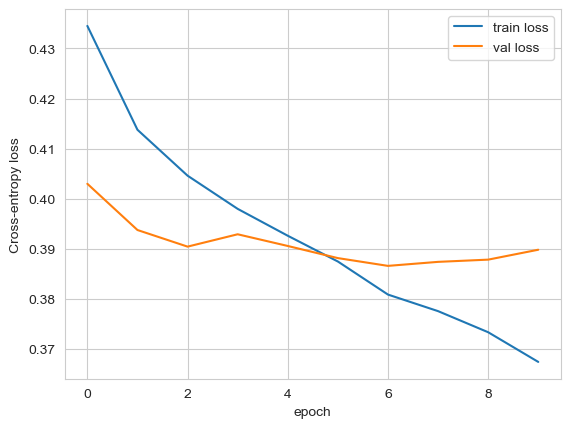

In [53]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

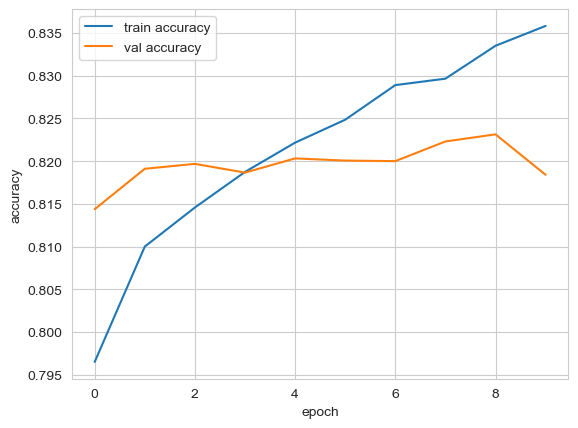

In [54]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

In [47]:
model.evaluate(X_test, y_test)

543/543 [==============================] - 2s 3ms/step - loss: 0.3938 - accuracy: 0.8211


[0.3937687873840332, 0.8211386799812317]

## Predictions

In [48]:
print(test_reviews.iloc[0]) #bad?

 Asked for late checkout and didnt get an answer then got a yes but had to pay 25 euros by noon they called to say sorry you have to leave in 1h knowing that i had a sick dog and an appointment next to the hotel  Location staff 


In [49]:
print( "Bad" if y_test[0][0] == 1 else "Good")

Bad


In [50]:
y_pred = model.predict(X_test[:1])

1/1 [==============================] - 0s 171ms/step


In [51]:
print(y_pred)

[[0.8405373  0.15946263]]
